# import and preprapration

In [2]:
#%%
import pandas as pd
import base64
import requests
from dotenv import load_dotenv
import os
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import json
import matplotlib.pyplot as plt
from umap import UMAP
from hdbscan import HDBSCAN


/Users/alessiogandelli/dev/uni/image-clustering/.venv/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [13]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
model = SentenceTransformer('clip-ViT-B-32')

img_path = '/Users/alessiogandelli/dev/uni/image-clustering/data/imgs'
img_files = [os.path.join(img_path, filename) for filename in os.listdir(img_path)]

let's see the images first


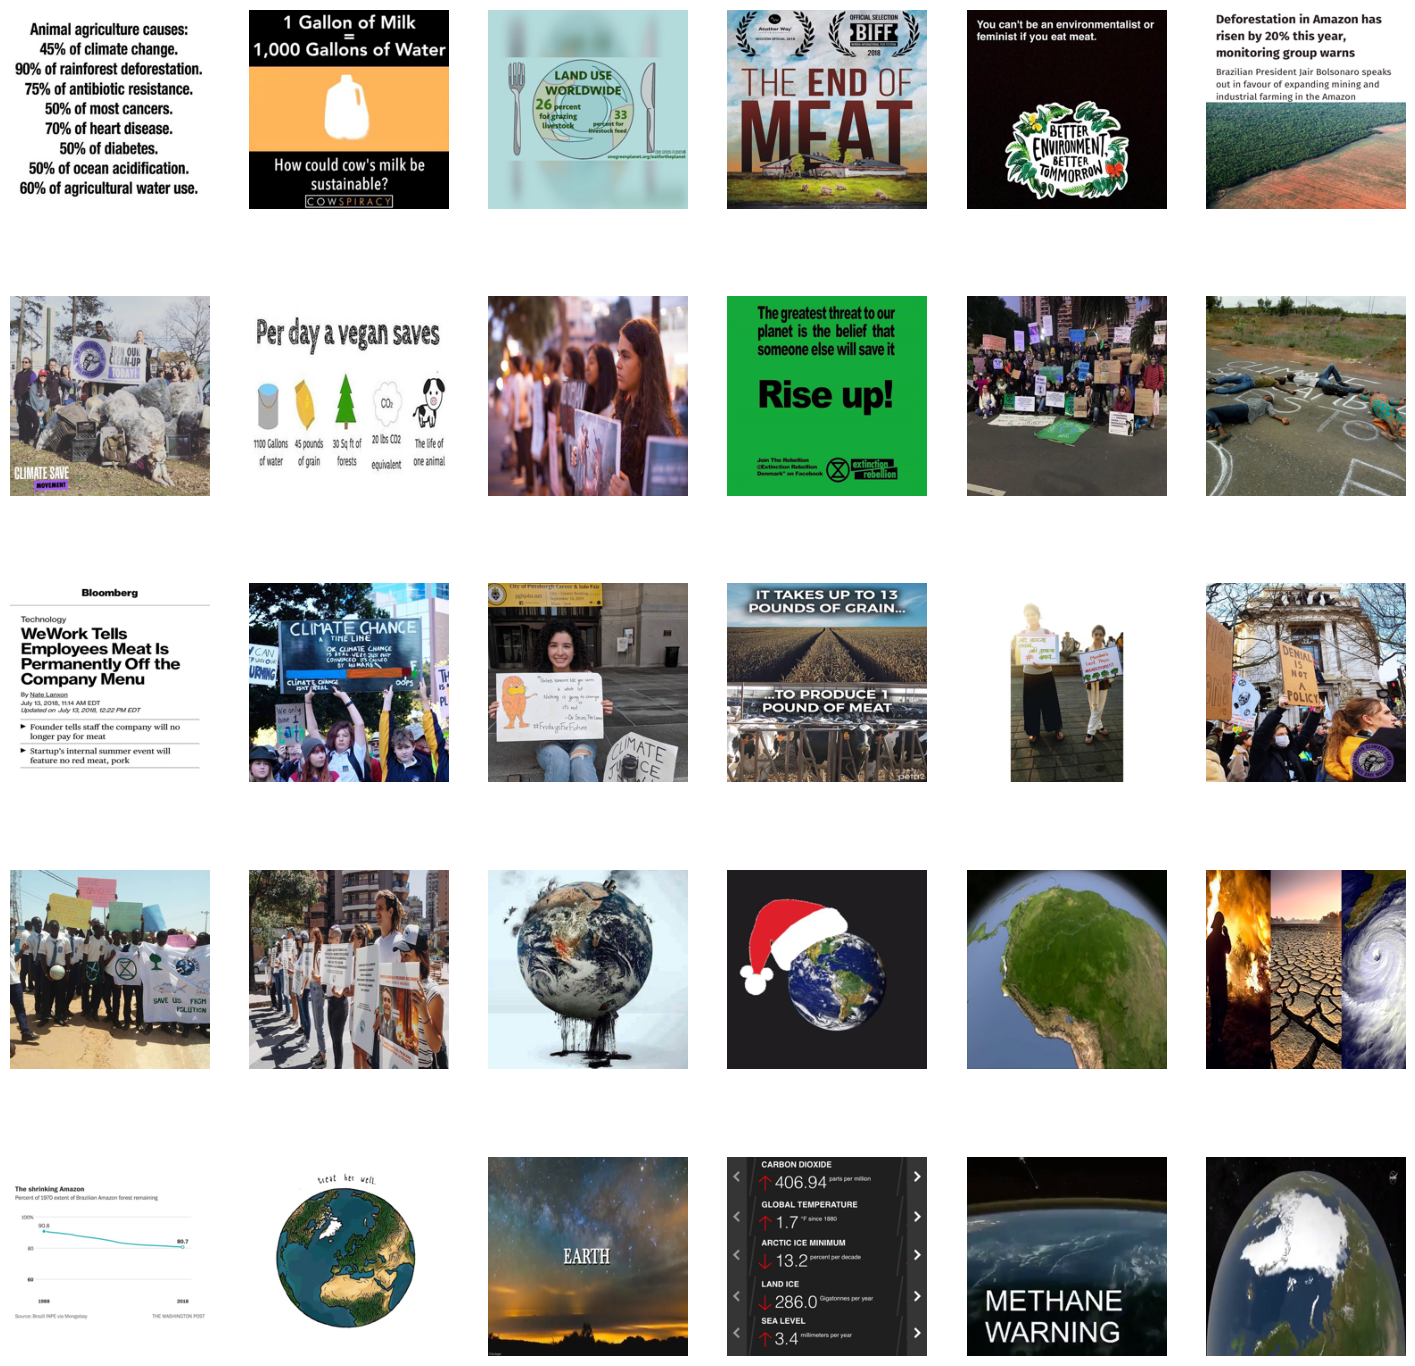

In [30]:
#5x5 image grid with 30 images
images = [Image.open(img_file).resize((224,224)) for img_file in img_files]
fig, axs = plt.subplots(5, 6, figsize=(18, 18))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')




# Image embeddings
image embeddings usinc clip model are created 

In [14]:
images_to_embed = [Image.open(filepath) for filepath in img_files]
img_emb = model.encode(images_to_embed, show_progress_bar=False)

now let's reduce the dimensionality using UMAP to 5 dimension and let's use HDSCAN to cluster the images, a limitation is the number of images we have 

In [15]:
reduced_embeddings = UMAP(n_components=5).fit_transform(img_emb)

clustering =  HDBSCAN(
    min_cluster_size=2,  # Lowered to accommodate small clusters
    min_samples=2,  # Close to min_cluster_size for consistency
    cluster_selection_method='eom',  # Excess of Mass for flexibility
    prediction_data=True  # Allows for soft clustering and outlier scores
).fit(reduced_embeddings)

In [18]:
labels = clustering.labels_

In [20]:
labels

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0])

now let's do a quick visualization of the points in 2D using UMAP

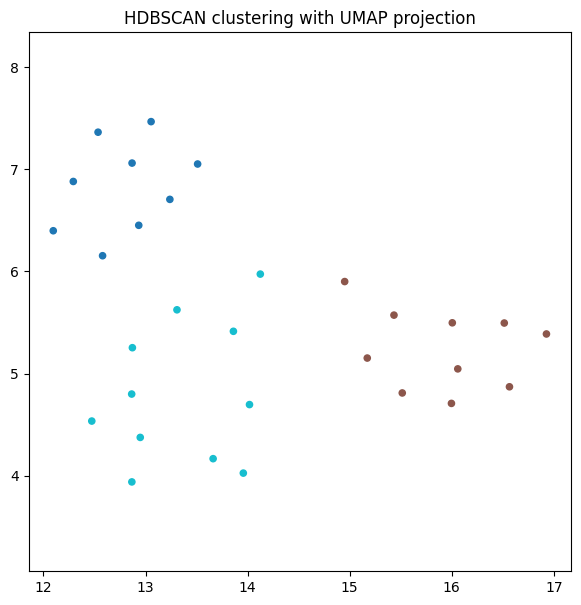

In [25]:
embeddings2d = UMAP(n_components=2).fit_transform(img_emb)

plt.figure(figsize=(7, 7))
plt.scatter(embeddings2d[:, 0], embeddings2d[:, 1], c=labels, cmap='tab10', s=20)
plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN clustering with UMAP projection')
plt.show()


let's visualize the 3 clusters we have

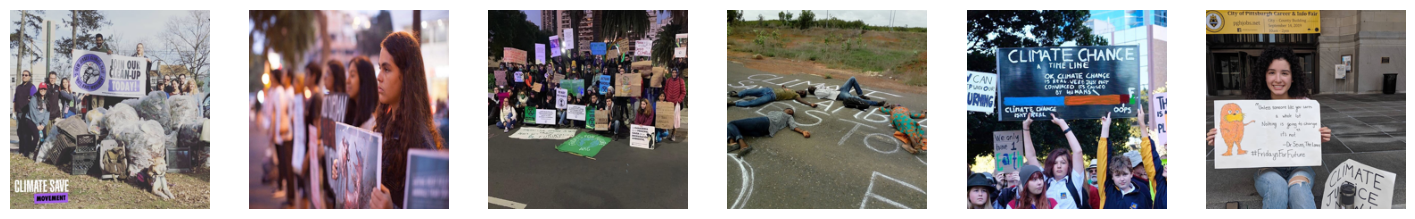

In [33]:
#plot only images with label =1 
images = [Image.open(img_file).resize((224,224)) for img_file in img_files]
#labels is a of the cluster of each image, devide the images in clusters
# get images with label 1
images_label1 = [images[i] for i in range(len(images)) if labels[i] == 1]

fig, axs = plt.subplots(1, 6, figsize=(18, 18))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images_label1[i])
    ax.axis('off')


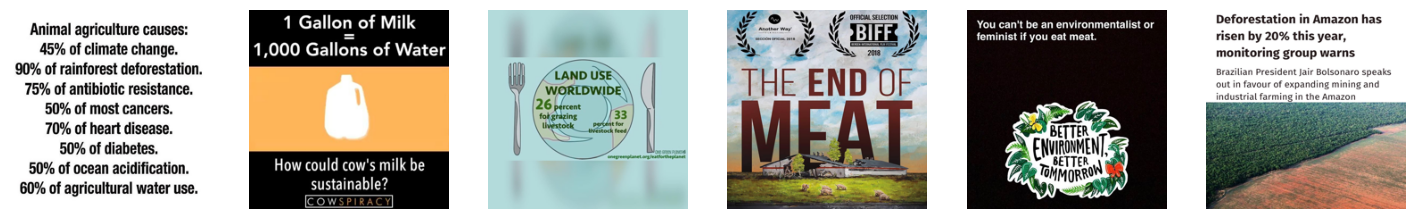

In [34]:
#same for label 2
images_label2 = [images[i] for i in range(len(images)) if labels[i] == 2]

fig, axs = plt.subplots(1, 6, figsize=(18, 18))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images_label2[i])
    ax.axis('off')

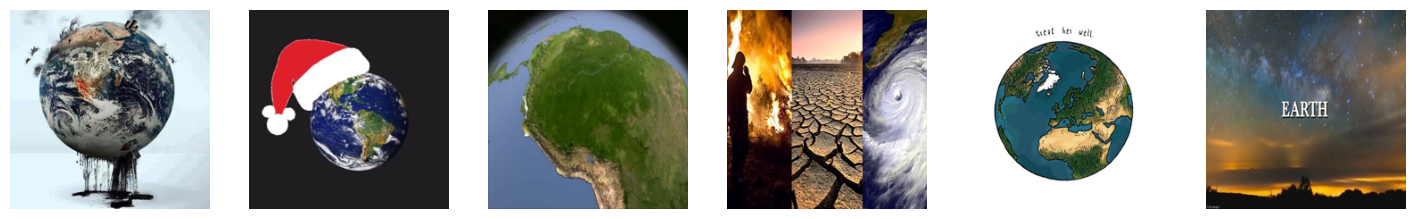

In [35]:
#same for label 0
images_label0 = [images[i] for i in range(len(images)) if labels[i] == 0]

fig, axs = plt.subplots(1, 6, figsize=(18, 18))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images_label0[i])
    ax.axis('off')